# **Système de télésurveillance des examens**


# 1. Importation des photos etudiants

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copier les photos des etudiants à partir d'un lien drive ou à partir d'un repertoire GIT

In [ ]:
!wget https://static.wikia.nocookie.net/disney/images/f/fa/Celine_Dion.jpg/revision/latest/scale-to-width-down/516?cb=20190329235707 -O known/celine-dione.jpg

--2021-02-18 14:19:11--  https://static.wikia.nocookie.net/disney/images/f/fa/Celine_Dion.jpg/revision/latest/scale-to-width-down/516?cb=20190329235707
Resolving static.wikia.nocookie.net (static.wikia.nocookie.net)... 74.120.184.204, 74.120.184.194
Connecting to static.wikia.nocookie.net (static.wikia.nocookie.net)|74.120.184.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85326 (83K) [image/jpeg]
Saving to: ‘known/celine-dione.jpg’

known/celine-dione. 100%[===================>]  83.33K  --.-KB/s    in 0.03s   

2021-02-18 14:19:11 (2.82 MB/s) - ‘known/celine-dione.jpg’ saved [85326/85326]



In [ ]:
!wget https://drive.google.com/file/d/1EIWcWENUS3-VXDGhRL2QAcXTGEvVytin/view?usp=sharing -O known/sarra-Khellaf.jpg

--2021-02-18 12:34:11--  https://drive.google.com/file/d/1EIWcWENUS3-VXDGhRL2QAcXTGEvVytin/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.203.100, 74.125.203.139, 74.125.203.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘known/sarra-Khellaf.jpg’

known/sarra-Khellaf     [ <=>                ]  68.77K  --.-KB/s    in 0.1s    

2021-02-18 12:34:11 (571 KB/s) - ‘known/sarra-Khellaf.jpg’ saved [70421]



In [ ]:
!ls

'imgres?imgurl=https:%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F1%2F14%2FAlbert_Einstein_1947.jpg'
'imgres?imgurl=https:%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Ff%2Ff5%2FC%C3%A9line_Dion_2012.jpg'
'imgres?imgurl=https:%2F%2Fwww.leparisien.fr%2Fresizer%2FKxgzvQ5D4Tm26S8C7ryl_kCDCFU=%2F932x582%2Farc-anglerfish-eu-central-1-prod-leparisien.s3.amazonaws.com%2Fpublic%2FTAHDZ7UF4Y4OI7SP3YN4OBLXAM.jpg'
 known
 sample_data
 unknown


# 2. Accès à la WebCam pour récupérer les images et les vidéos

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 93kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=123bd112f90cc7944093ad1f2205b680ed3b06a281d7a1f71bab83f57f499dd9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

RuntimeError: ignored

In [ ]:
!cd 

In [ ]:
!ls

Aissata-Keita-11707869.JPEG	    Sarra-Khellaf-12014325.JPEG
Napo-Tiyadja-TCHEDRE-12013794.JPEG


In [ ]:
def read_img(path):
    img = cv2.imread(path)
    print (img.shape)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = '/content/drive/MyDrive/projetIOT/img'
os.chdir(known_dir)

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = '/content/drive/MyDrive/projetIOT/img_unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)
            

    # print(results)

FileNotFoundError: ignored

In [ ]:
# importation des dépendences

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

Dans cette partie du projet, nous utiliserons Haar Cascade d'OpenCV pour faire la détection de visage sur l'image et la vidéo de notre webcam

Fonctions d'assistance pour convertir l'objet  javascript en N OpenCV

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# 2. Haar Cascade Classifier

Pour cette partie du projet, nous allons exécuter un algorithme de détection d'objet simple appelé Haar Cascade sur nos images et vidéos extraites de notre webcam. OpenCV dispose d'un modèle de détection de visage Haar Cascade pré-formé.

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

Images de webcam
L'exécution de code sur les images prises à partir de la webcam est assez simple. Nous utiliserons du code dans les extraits de code de Google Colab qui ont une variété de fonctions de code utiles pour effectuer diverses tâches.

Nous utiliserons l'extrait de code pour Camera Capture pour utiliser la webcam de votre ordinateur.

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to napo.jpg


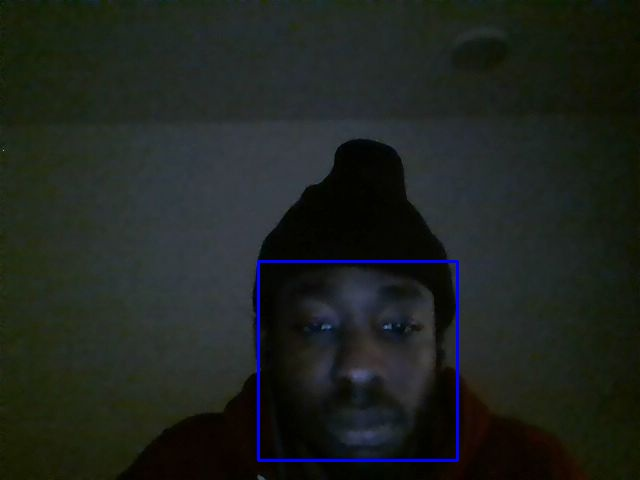

In [ ]:
try:
  filename = take_photo('napo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

L'exécution de code sur une vidéo webcam est un peu plus complexe que les images. Nous devons démarrer un flux vidéo en utilisant notre webcam comme entrée. Ensuite, nous exécutons chaque image à travers notre programme (détection de visage) et créons une image de superposition qui contient une boîte englobante de détection (s). Nous superposons ensuite l'image de la boîte englobante sur l'image suivante de notre flux vidéo.

# 3. Live vidéo streame

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# 4. Reconnaissance faciale

(à debuger)



In [ ]:
import cv2

# Load HaarCascade from the file with OpenCV
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Prendre des photos avec la caméra du PC
cam = cv2.VideoCapture(0)

while cam.isOpened():
  # Read the image
  _, image = cam.read()
  tickmark = cv2.getTickCount()
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Detect faces in the image
  faces = faceCascade.detectMultiScale(
      image_gray,
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(30, 30)
      )
      #faces = faceCascade.detectMultiScale(gray, 1.2, 5)

  if len(faces) > 0:
        # Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)        
        (x, y, w, h) = faces[0]
        center_x = x+w/2
        center_y = y+h/2
        height, width, channels = im.shape
        b_dim = min(max(w,h)*1.2,width, height)
        box = [center_x-b_dim/2, center_y-b_dim/2, center_x+b_dim/2, center_y+b_dim/2]
        box = [int(x) for x in box]
        # Crop Image
        if box[0] >= 0 and box[1] >= 0 and box[2] <= width and box[3] <= height:
            crpim = im[box[1]:box[3],box[0]:box[2]]
            crpim = cv2.resize(crpim, (224,224), interpolation = cv2.INTER_AREA)
            print("Found {0} faces!".format(len(faces)))

        key = cv2.waitKey(100)
        cv2.imshow("preview", img)

        if cv2.waitKey(1)&0xFF == 27: # exit on ESC
           break

cam.release()
cv2.destroyAllWindows()

In [ ]:
import dlib
import cv2
from imutils import face_utils

cam = cv2.VideoCapture(0)

while True:
  _ret, image = cam.read()
  tickmark = cv2.getTickCount()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

  dots_size = 5

  rects = detector(gray, 1)
  # loop over the face detections
  for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	  shape = predictor(gray, rect)
	  shape = face_utils.shape_to_np(shape)
 
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	  (x, y, w, h) = face_utils.rect_to_bb(rect)
	  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
	# show the face number
	  cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
 
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	  for (x, y) in shape:
		  cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)
 
# show the output image with the face detections + facial landmarks
  cv2.imshow("Output", image)

cam.release()
cv2.destroyAllWindows()

In [ ]:
! pip install Click
! pip install cmake
! pip install dlib 
! pip install face-recognition
! pip install face-recognition-models
! pip install numpy  
! pip install six 

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=4c246f03fe5bca9bb64f671cf8ed5e4189ed9f33c7a565ecd419250605f28de9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
!mkdir img

In [ ]:
! pip install face_recognition

In [ ]:
import face_recognition
import numpy as np
import cv2, queue, threading, time
import requests, os, re
video_capture = cv2.VideoCapture(0)

known_face_encodings = []
known_face_names = []
known_faces_filenames = []
for (dirpath, dirnames, filenames) in os.walk('img/'):
    known_faces_filenames.extend(filenames)
    break
for filename in known_faces_filenames:
    face = face_recognition.load_image_file('img/' + filename)
    known_face_names.append(re.sub("[0-9]",'', filename[:-4]))
    known_face_encodings.append(face_recognition.face_encodings(face)[0])
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True
while True:
    frame = video_capture.read()
    if process_this_frame:
        face_locations = face_recognition.face_locations(frame)
        face_encodings = face_recognition.face_encodings(frame, face_locations)
        face_names = []
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
            face_names.append(name)
    process_this_frame = not process_this_frame
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

TypeError: ignored

In [ ]:
import cv2
import numpy as np
from imutils import face_utils
from pathlib import Path
import os
import ntpath

print('[INFO] Starting System...')
print('[INFO] Importing pretrained model..')
pose_predictor_68_point = dlib.shape_predictor("/content/drive/MyDrive/pretrained_model/shape_predictor_68_face_landmarks.dat")
pose_predictor_5_point = dlib.shape_predictor("/content/drive/MyDrive/pretrained_model/shape_predictor_5_face_landmarks.dat")
face_encoder = dlib.face_recognition_model_v1("/content/drive/MyDrive/pretrained_model/dlib_face_recognition_resnet_model_v1.dat")
face_detector = dlib.get_frontal_face_detector()
print('[INFO] Importing pretrained model..')


def transform(image, face_locations):
    coord_faces = []
    for face in face_locations:
        rect = face.top(), face.right(), face.bottom(), face.left()
        coord_face = max(rect[0], 0), min(rect[1], image.shape[1]), min(rect[2], image.shape[0]), max(rect[3], 0)
        coord_faces.append(coord_face)
    return coord_faces


def encode_face(image):
    face_locations = face_detector(image, 1)
    face_encodings_list = []
    landmarks_list = []
    for face_location in face_locations:
        # DETECT FACES
        shape = pose_predictor_68_point(image, face_location)
        face_encodings_list.append(np.array(face_encoder.compute_face_descriptor(image, shape, num_jitters=1)))
        # GET LANDMARKS
        shape = face_utils.shape_to_np(shape)
        landmarks_list.append(shape)
    face_locations = transform(image, face_locations)
    return face_encodings_list, face_locations, landmarks_list


def easy_face_reco(frame, known_face_encodings, known_face_names):
    rgb_small_frame = frame[:, :, ::-1]
    # ENCODING FACE
    face_encodings_list, face_locations_list, landmarks_list = encode_face(rgb_small_frame)
    face_names = []
    for face_encoding in face_encodings_list:
        if len(face_encoding) == 0:
            return np.empty((0))
        # CHECK DISTANCE BETWEEN KNOWN FACES AND FACES DETECTED
        vectors = np.linalg.norm(known_face_encodings - face_encoding, axis=1)
        tolerance = 0.6
        result = []
        for vector in vectors:
            if vector <= tolerance:
                result.append(True)
            else:
                result.append(False)
        if True in result:
            first_match_index = result.index(True)
            name = known_face_names[first_match_index]
        else:
            name = "Unknown"
        face_names.append(name)

    for (top, right, bottom, left), name in zip(face_locations_list, face_names):
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.rectangle(frame, (left, bottom - 30), (right, bottom), (0, 255, 0), cv2.FILLED)
        cv2.putText(frame, name, (left + 2, bottom - 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)

    for shape in landmarks_list:
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (255, 0, 255), -1)


if __name__ == '__main__':
    args = parser.parse_args()

    print('[INFO] Importing faces...')
    face_to_encode_path = Path(args.input)
    files = [file_ for file_ in face_to_encode_path.rglob('*.jpg')]

    for file_ in face_to_encode_path.rglob('*.png'):
        files.append(file_)
    if len(files)==0:
        raise ValueError('No faces detect in the directory: {}'.format(face_to_encode_path))
    known_face_names = [os.path.splitext(ntpath.basename(file_))[0] for file_ in files]

    known_face_encodings = []
    for file_ in files:
        image = PIL.Image.open(file_)
        image = np.array(image)
        face_encoded = encode_face(image)[0][0]
        known_face_encodings.append(face_encoded)

    print('[INFO] Faces well imported')
    print('[INFO] Starting Webcam...')
    video_capture = cv2.VideoCapture(0)
    print('[INFO] Webcam well started')
    print('[INFO] Detecting...')
    while True:
        ret, frame = video_capture.read()
        easy_face_reco(frame, known_face_encodings, known_face_names)
        cv2.imshow('Easy Facial Recognition App', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    print('[INFO] Stopping System')
    video_capture.release()
    cv2.destroyAllWindows()


# 5. Reconnaisance faciale ( alternative/ à Choisir )



In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
image_file = take_photo()

<IPython.core.display.Javascript object>

400 300


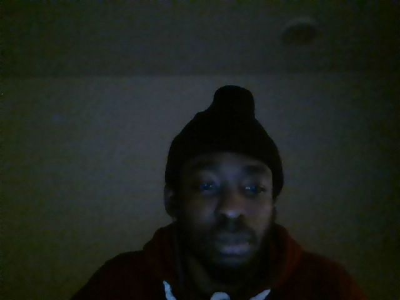

In [ ]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2021-02-12 00:58:59--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2021-02-12 00:58:59 (149 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2021-02-12 00:58:59--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

In [ ]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [ ]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [ ]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [ ]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

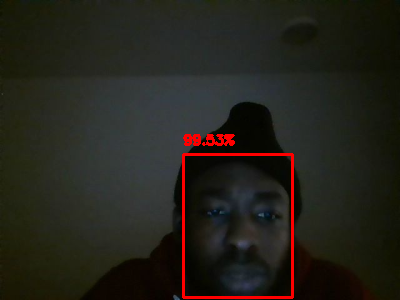

In [ ]:
cv2_imshow(image)